In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import config

# Data Import

* education - уровень образования
* sex - пол заемщика
* age - возраст заемщика
* car - флаг наличия автомобиля
* car_type - флаг автомобиля иномарки
* decline_app_cnt - количество отказанных прошлых заявок
* good_work - флаг наличия “хорошей” работы
* bki_request_cnt - количество запросов в БКИ
* income - доход заемщика
* foreign_passport - наличие загранпаспорта
* sna - связь заемщика с клиентами банка
* first_time - давность наличия информации о заемщике
* score_bki - скоринговый балл по данным из БКИ
* region_rating - рейтинг региона
* default - флаг дефолта по кредиту

In [3]:
df = pd.read_csv(config.DATA_FILE_NAME)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [5]:
df = df.drop(["client_id", "home_address", "work_address", "app_date"], axis=1)
df = df.dropna()

In [6]:
df.describe()

,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time,default
count,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000,73492.000000
mean,39.270383,0.276465,0.164943,-1.904534,2.001238,56.710798,41085.328321,1.733821,2.764981,0.127048
std,11.520214,0.805463,0.371132,0.498249,2.252317,13.043377,46050.474530,1.123602,1.009168,0.333029
min,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1000.000000,1.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,-2.259407,0.000000,50.000000,20000.000000,1.000000,2.000000,0.000000
50%,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,30000.000000,1.000000,3.000000,0.000000
75%,48.000000,0.000000,0.000000,-1.569545,3.000000,60.000000,48000.000000,2.000000,4.000000,0.000000
max,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,1000000.000000,4.000000,4.000000,1.000000


In [7]:
df.describe(include="object")

,education,sex,car,car_type,foreign_passport
count,73492,73492,73492,73492,73492
unique,5,2,2,2,2
top,SCH,F,N,N,N
freq,38860,41393,49644,59528,62482


# Visualization

## Target

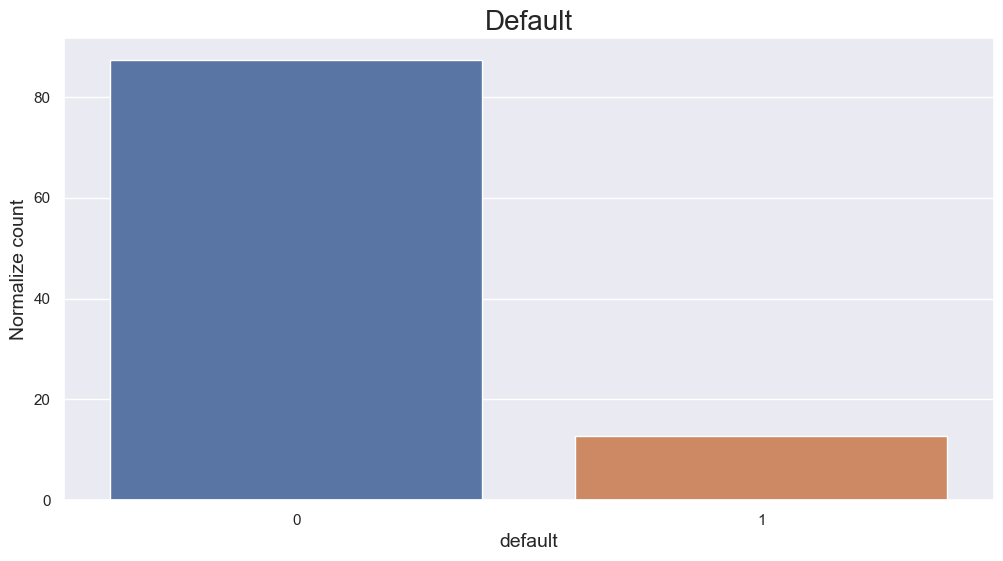

In [8]:
norm_target = (df["default"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='index', y='percent', data=norm_target)

plt.title("Default", fontsize=20)
plt.xlabel("default", fontsize=14)
plt.ylabel("Normalize count", fontsize=14);

## Age

<Axes: title={'center': 'Age'}, xlabel='Age', ylabel='Density'>

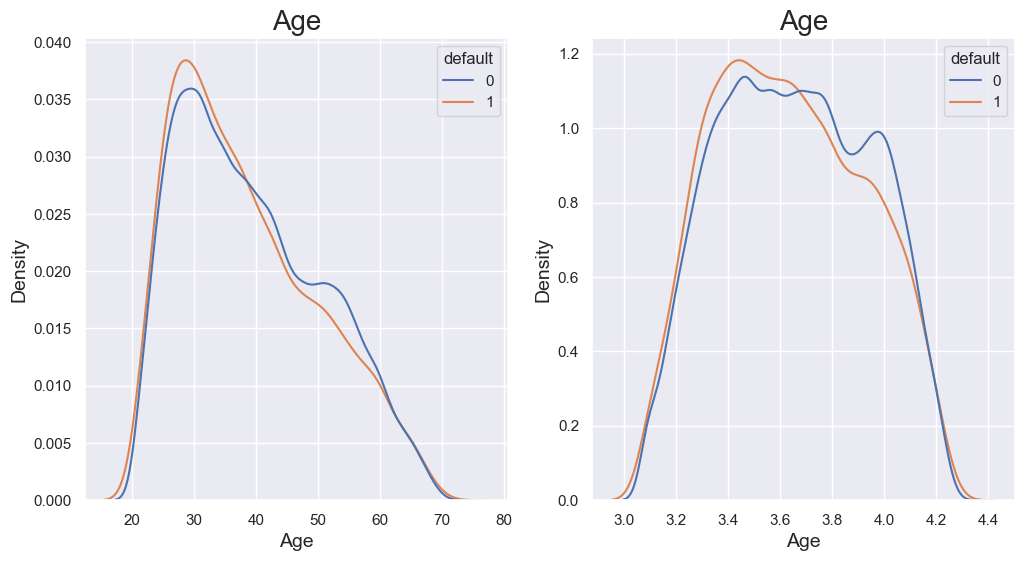

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title("Age", fontsize=20)
axs[0].set_xlabel("Age", fontsize=14)
axs[0].set_ylabel("Density", fontsize=14);
sns.kdeplot(ax=axs[0], data=df, x="age", hue="default", common_norm=False)

df["log_age"] = np.log1p(df["age"])

axs[1].set_title("Age", fontsize=20)
axs[1].set_xlabel("Age", fontsize=14)
axs[1].set_ylabel("Density", fontsize=14);
sns.kdeplot(ax=axs[1], data=df, x="log_age", hue="default", common_norm=False);


## Education

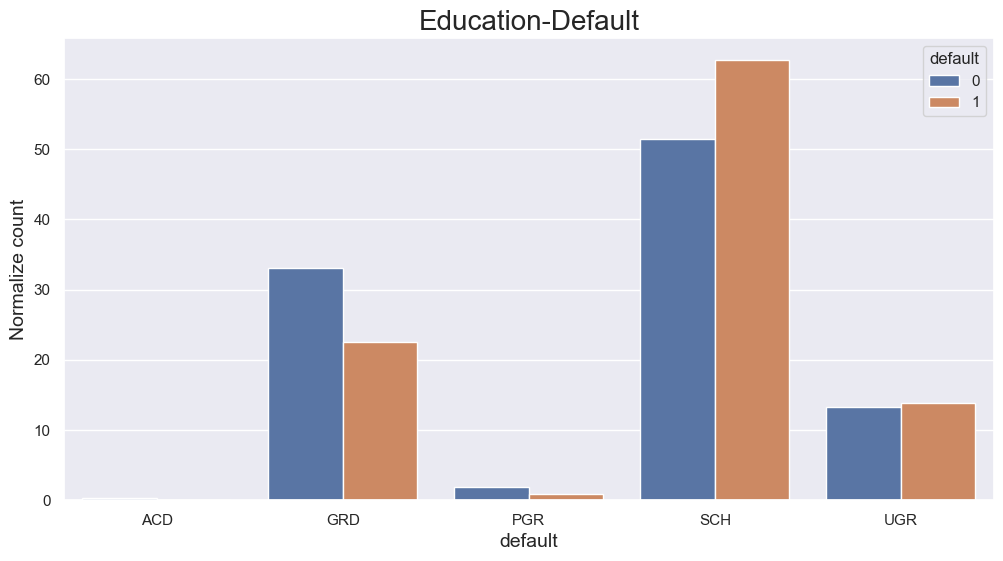

In [10]:
educ_def = (df.groupby(df["default"])["education"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index()
              .sort_values("education"))
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="education", y="percent", hue="default", data=educ_def)

plt.title("Education - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("default", fontsize=14);

## Car

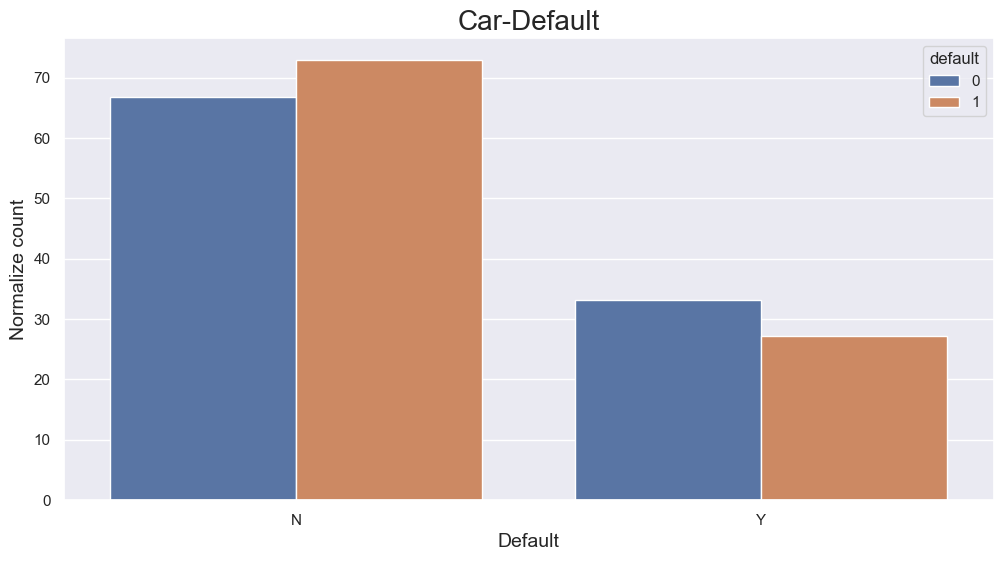

In [22]:
car_def = (df.groupby(df["default"])["car"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="car", y="percent", hue="default", data=car_def)

plt.title("Car - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## Car Type

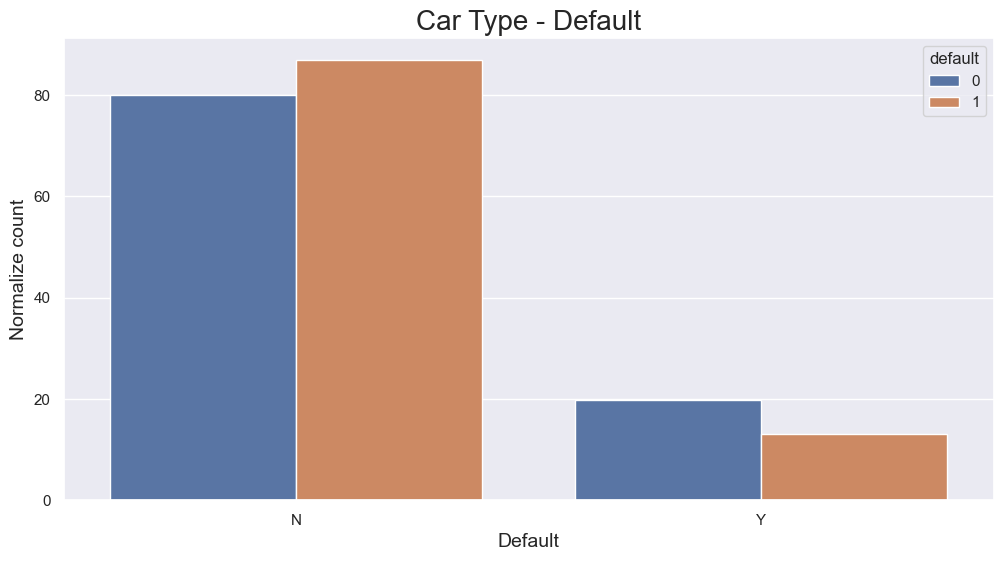

In [24]:
car_type_def = (df.groupby(df["default"])["car_type"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="car_type", y="percent", hue="default", data=car_type_def)

plt.title("Car Type - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## Sex

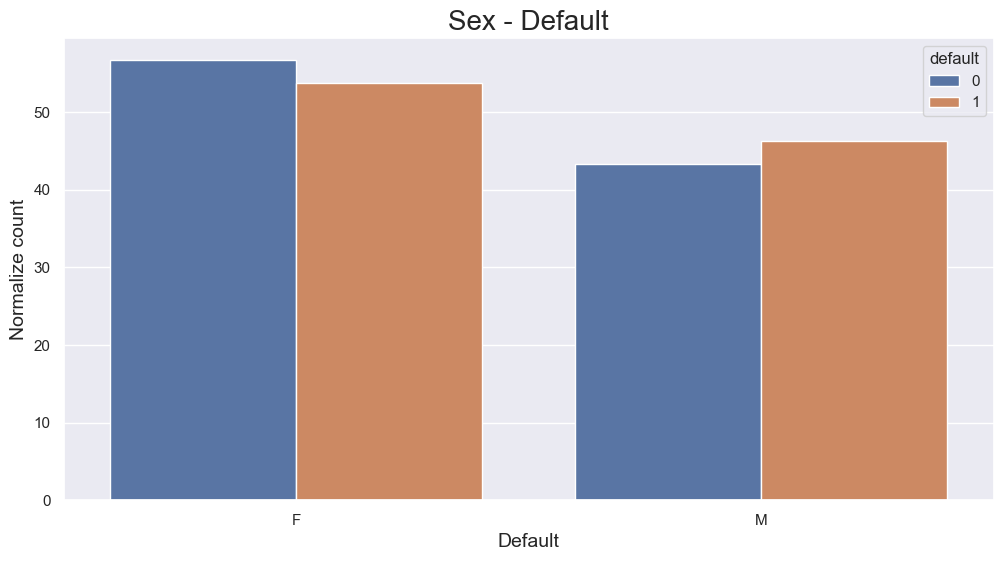

In [30]:
sex_def = (df.groupby(df["default"])["sex"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="sex", y="percent", hue="default", data=sex_def)

plt.title("Sex - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## Foreign passport

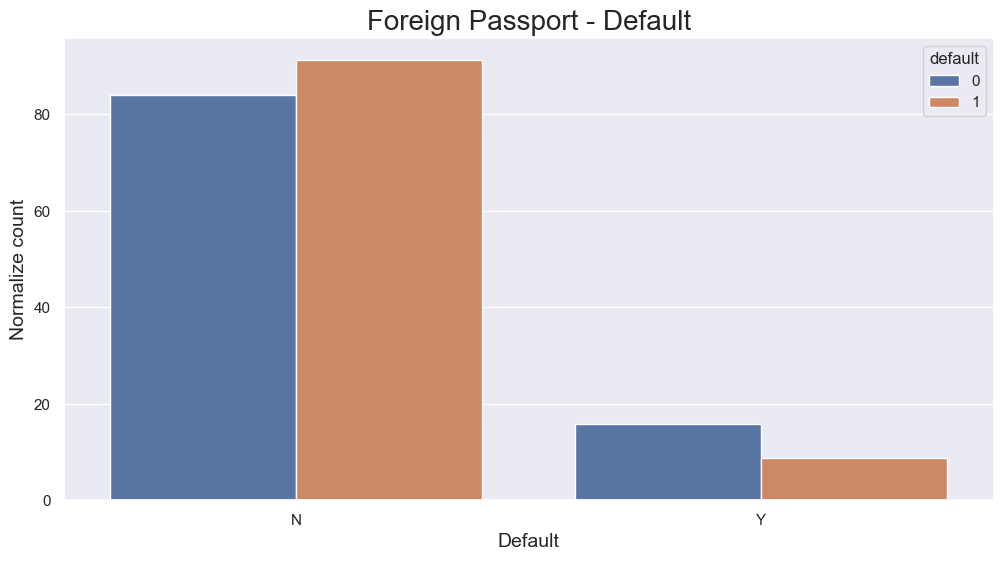

In [32]:
foreign_passport_def = (df.groupby(df["default"])["foreign_passport"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="foreign_passport", y="percent", hue="default", data=foreign_passport_def)

plt.title("Foreign Passport - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## First Time

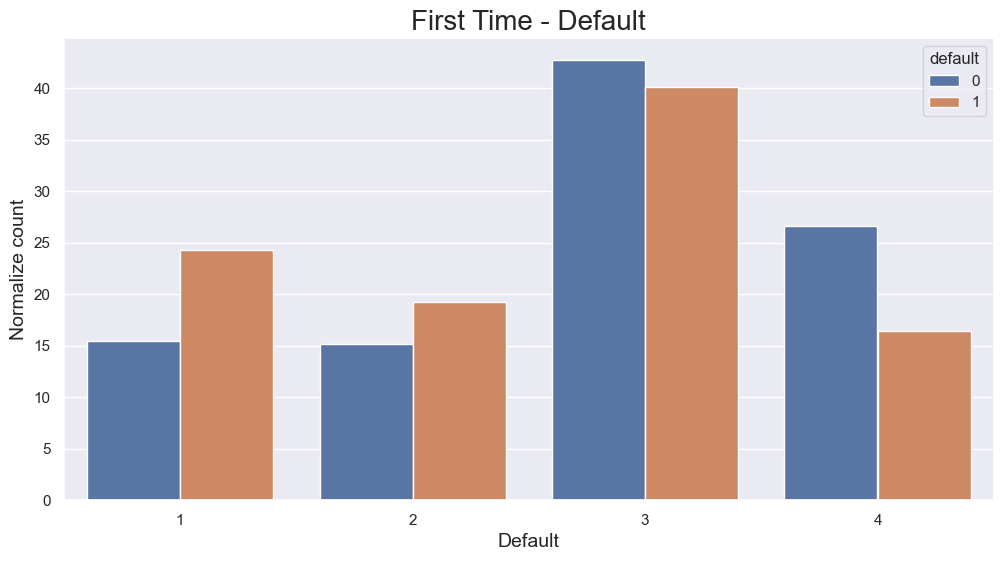

In [33]:
first_time_def = (df.groupby(df["default"])["first_time"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="first_time", y="percent", hue="default", data=first_time_def)

plt.title("First Time - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## Good Work

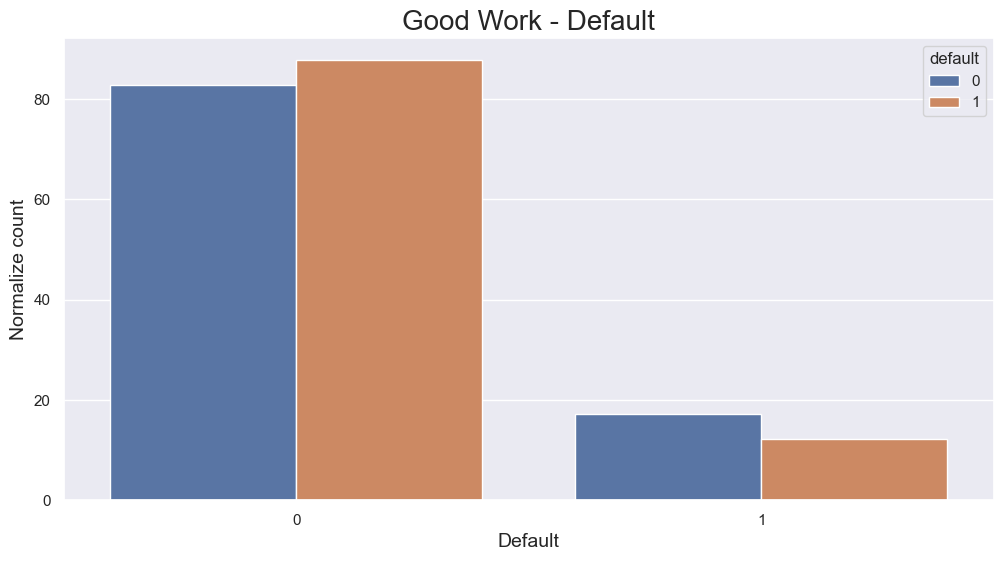

In [34]:
good_work_def = (df.groupby(df["default"])["good_work"]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index())
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="good_work", y="percent", hue="default", data=good_work_def)

plt.title("Good Work - Default", fontsize=20)
plt.ylabel("Normalize count", fontsize=14)
plt.xlabel("Default", fontsize=14);

## Income

<Axes: xlabel='Income', ylabel='Density'>

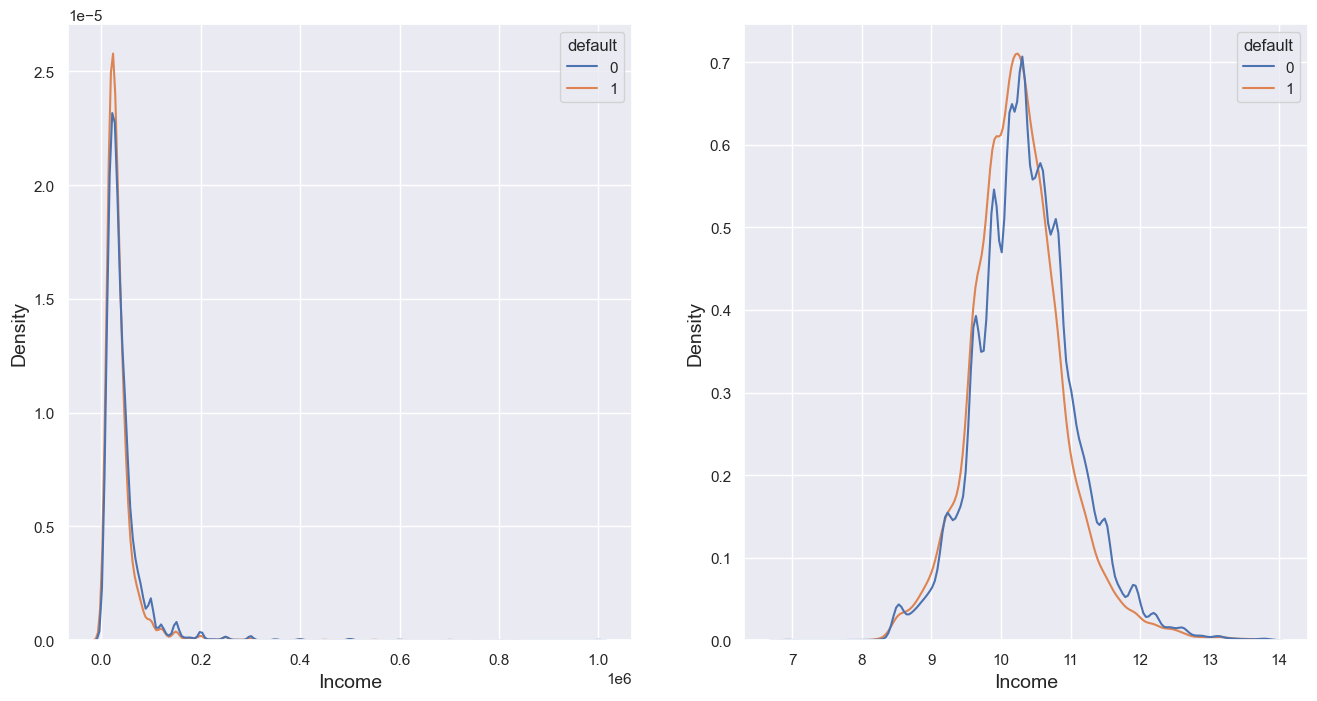

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_xlabel("Income", fontsize=14)
axs[0].set_ylabel("Density", fontsize=14)
sns.kdeplot(ax=axs[0], data=df, x="income", hue="default", common_norm=False)

df["log_income"] = np.log1p(df["income"])

axs[1].set_xlabel("Income", fontsize=14)
axs[1].set_ylabel("Density", fontsize=14)
sns.kdeplot(ax=axs[1], data=df, x="log_income", hue="default", common_norm=False)

## Score BKI

<Axes: xlabel='Score BKI', ylabel='Density'>

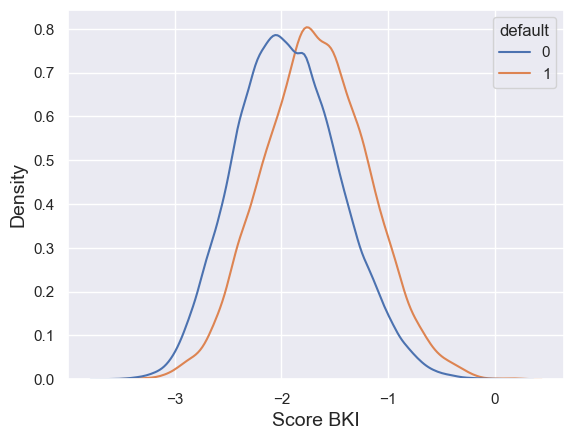

In [39]:
plt.xlabel("Score BKI", fontsize=14)
plt.ylabel("Density", fontsize=14)
sns.kdeplot(data=df, x="score_bki", hue="default", common_norm=False);

## Correlation

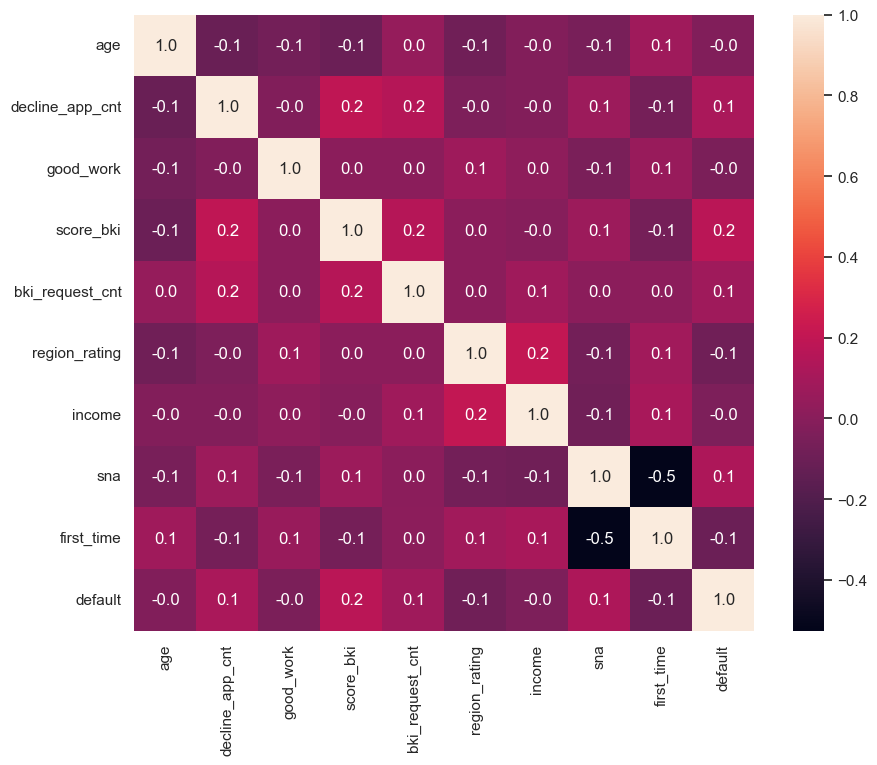

In [12]:
num_cols = ["age", "decline_app_cnt", "good_work", "score_bki", "bki_request_cnt", 
    "region_rating", "income", "sna", "first_time", "default"]

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".1f");